In [21]:
#Initialized Random Seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ROLL_NUMBER = 81

np.random.seed(ROLL_NUMBER)


2. Generate Sales Data

In [22]:
# Generate random sales data between 1000 and 5000
sales_data = np.random.randint(1000, 5001, size=(12, 4))#12 months data with 4 columns with random seed

sales_data


array([[4907, 2729, 4896, 1942],
       [1075, 4523, 2009, 2713],
       [3941, 4114, 4873, 2155],
       [4305, 2764, 1083, 4768],
       [3986, 2546, 4764, 3989],
       [1961, 4120, 1485, 3651],
       [2375, 4451, 2807, 4533],
       [3676, 4713, 3142, 1674],
       [1350, 2540, 4611, 1801],
       [3316, 3732, 1115, 4571],
       [1955, 1299, 3161, 3107],
       [1256, 1988, 2084, 2817]])

3. Convert to DataFrame
• Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Monthsfrom Jan to Dec

In [23]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

columns = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

df = pd.DataFrame(sales_data, columns=columns, index=months)

df


,Electronics,Clothing,Home & Kitchen,Sports
Jan,4907,2729,4896,1942
Feb,1075,4523,2009,2713
Mar,3941,4114,4873,2155
Apr,4305,2764,1083,4768
May,3986,2546,4764,3989
Jun,1961,4120,1485,3651
Jul,2375,4451,2807,4533
Aug,3676,4713,3142,1674
Sep,1350,2540,4611,1801
Oct,3316,3732,1115,4571


Part II: Data Manipulation and Analysis(Pandas)
1. Display the first 5 rows and summary statistics of the DataFrame.

In [24]:
df.head()


,Electronics,Clothing,Home & Kitchen,Sports
Jan,4907,2729,4896,1942
Feb,1075,4523,2009,2713
Mar,3941,4114,4873,2155
Apr,4305,2764,1083,4768
May,3986,2546,4764,3989


In [25]:
df.describe()


,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,2841.916667,3293.250000,3002.500000,3143.416667
std,1330.964480,1120.996726,1484.394489,1138.405141
min,1075.000000,1299.000000,1083.000000,1674.000000
25%,1803.750000,2544.500000,1878.000000,2101.750000
50%,2845.500000,3248.000000,2974.500000,2962.000000
75%,3952.250000,4202.750000,4649.250000,4125.000000
max,4907.000000,4713.000000,4896.000000,4768.000000


2. Calculate the totalsales per category and totalsales per month.

In [26]:
total_per_category = df.sum()
total_per_month = df.sum(axis=1)

print("Total per category:\n", total_per_category)
print("\nTotal per month:\n", total_per_month)


Total per category:
 Electronics       34103
Clothing          39519
Home & Kitchen    36030
Sports            37721
dtype: int64

Total per month:
 Jan    14474
Feb    10320
Mar    15083
Apr    12920
May    15285
Jun    11217
Jul    14166
Aug    13205
Sep    10302
Oct    12734
Nov     9522
Dec     8145
dtype: int64


3. Calculate the average sales growth between consecutive monthsfor each category.

In [27]:
growth = df.pct_change()
avg_growth = growth.mean()

avg_growth


,0
Electronics,0.200893
Clothing,0.073097
Home & Kitchen,0.452906
Sports,0.178810


4. Add the following columns to the DataFrame:
• Total Sales: Sum of all categories per month.
• Growth Rate: Percentage change in Total Salesfrom the previous month.

In [28]:
df["Total Sales"] = df.sum(axis=1)
df["Growth Rate"] = df["Total Sales"].pct_change() * 100

df


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,4907,2729,4896,1942,14474,NaN
Feb,1075,4523,2009,2713,10320,-28.699737
Mar,3941,4114,4873,2155,15083,46.153101
Apr,4305,2764,1083,4768,12920,-14.340648
May,3986,2546,4764,3989,15285,18.304954
Jun,1961,4120,1485,3651,11217,-26.614328
Jul,2375,4451,2807,4533,14166,26.290452
Aug,3676,4713,3142,1674,13205,-6.783849
Sep,1350,2540,4611,1801,10302,-21.984097
Oct,3316,3732,1115,4571,12734,23.607067


5. Apply a randomized discount:
• If your roll number is even, apply a 10% discount to the Electronics category.
• If odd, apply a 15% discount to the Clothing category.

In [29]:
if ROLL_NUMBER % 2 == 0:
    df["Electronics"] = df["Electronics"] * 0.90
    print("10% discount applied to Electronics")
else:
    df["Clothing"] = df["Clothing"] * 0.85
    print("15% discount applied to Clothing")

df


15% discount applied to Clothing


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,4907,2319.65,4896,1942,14474,NaN
Feb,1075,3844.55,2009,2713,10320,-28.699737
Mar,3941,3496.90,4873,2155,15083,46.153101
Apr,4305,2349.40,1083,4768,12920,-14.340648
May,3986,2164.10,4764,3989,15285,18.304954
Jun,1961,3502.00,1485,3651,11217,-26.614328
Jul,2375,3783.35,2807,4533,14166,26.290452
Aug,3676,4006.05,3142,1674,13205,-6.783849
Sep,1350,2159.00,4611,1801,10302,-21.984097
Oct,3316,3172.20,1115,4571,12734,23.607067


Part III: Visualizations(Matplotlib and Seaborn)
1. Plot monthly salestrendsfor each category using line plots.

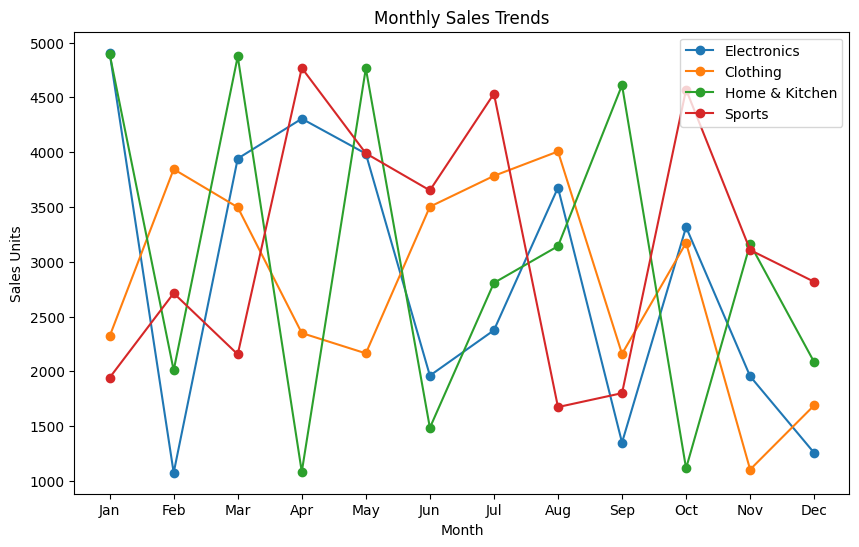

In [30]:
plt.figure(figsize=(10,6))

for col in columns:
    plt.plot(df.index, df[col], marker='o', label=col)

plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales Units")
plt.legend()
plt.show()


2. Create the following plots:
• Box plotsto show the sales distribution for each category.

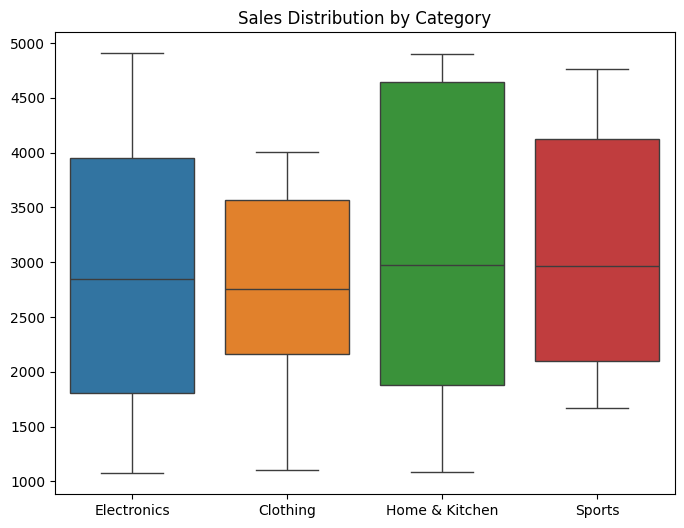

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[columns])
plt.title("Sales Distribution by Category")
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])

In [32]:
array = np.array([[1, -2, 3], [-4, 5, -6]])


i. Find element-wise absolute value

In [33]:
abs_array = np.abs(array)
abs_array


array([[1, 2, 3],
       [4, 5, 6]])

ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, for each
row.

In [34]:
# Flattened
np.percentile(array.flatten(), [25, 50, 75])

# Column-wise
np.percentile(array, [25, 50, 75], axis=0)

# Row-wise
np.percentile(array, [25, 50, 75], axis=1)


array([[-0.5, -5. ],
       [ 1. , -4. ],
       [ 2. ,  0.5]])

iii. Mean, Median and Standard Deviation of flattened array, of each column, and
each row

In [35]:
# Flattened
print(np.mean(array), np.median(array), np.std(array))

# Column-wise
print(np.mean(array, axis=0))
print(np.median(array, axis=0))
print(np.std(array, axis=0))

# Row-wise
print(np.mean(array, axis=1))
print(np.median(array, axis=1))
print(np.std(array, axis=1))


-0.5 -0.5 3.8622100754188224
[-1.5  1.5 -1.5]
[-1.5  1.5 -1.5]
[2.5 3.5 4.5]
[ 0.66666667 -1.66666667]
[ 1. -4.]
[2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
i. Find floor, ceiling and truncated value,rounded values

In [36]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

print("Floor:", np.floor(a))
print("Ceiling:", np.ceil(a))
print("Truncated:", np.trunc(a))
print("Rounded:", np.round(a))


Floor: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling: [-1. -1. -0.  1.  2.  2.  3.]
Truncated: [-1. -1. -0.  0.  1.  1.  3.]
Rounded: [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elementsin a list in Python Using a Temporary Variable.

In [37]:
def swap_list_elements(lst, i, j):
    temp = lst[i]
    lst[i] = lst[j]
    lst[j] = temp
    return lst

my_list = [10, 20, 30, 40]
print(swap_list_elements(my_list, 1, 3))


[10, 40, 30, 20]


Q.5 Write a Python program to swap two elementsin a set by converting it to a list first.

In [38]:
def swap_set_elements(s, i, j):
    lst = list(s)
    lst[i], lst[j] = lst[j], lst[i]
    return set(lst)

my_set = {1, 2, 5, 4}
print(swap_set_elements(my_set, 0, 2))


{1, 2, 4, 5}
